In [25]:
#import the libraries for data preprocessing and analysis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set()

In [5]:
data = pd.read_csv("compliance.csv")

In [6]:
data.head()

,Profile,State,Exempt,Description,Status,Category,Classification,Type
0,New York Datacenter,Monitor,True,Establish and maintain identification mechanis...,Compliant,Physical and environmental protection,Preventive,Establish/Maintain Documentation
1,New York Datacenter,Monitor,False,Review facility access lists.,Not Applicable,Physical and environmental protection,Detective,Establish/Maintain Documentation
2,New York Datacenter,Monitor,False,"Manage access to loading docks, unloading dock...",Compliant,Physical and environmental protection,Preventive,Physical and Environmental Protection
3,New York Datacenter,Monitor,False,Establish and maintain a visitor access permis...,Not Applicable,Physical and environmental protection,Preventive,Establish/Maintain Documentation
4,New York Datacenter,Monitor,False,Use locks with electronic authentication syste...,Compliant,Physical and environmental protection,Preventive,Configuration


In [7]:
#check for nan values
data.isnull().sum()

Profile            0
State              0
Exempt             0
Description       12
Status            27
Category           3
Classification     3
Type               3
dtype: int64

In [8]:
#we are dropping the NAN rows
data.dropna(axis=0, inplace=True)

In [9]:
#here based on the decription we need to classify the classification type
y= data['Classification']

Text(0.5, 1.0, 'Number of Preventive and Detective class')

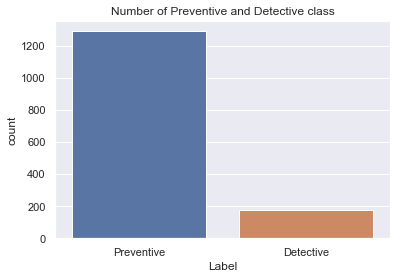

In [10]:
#distribution of Preventive and Detective class
sns.countplot(y)
plt.xlabel('Label')
plt.title('Number of Preventive and Detective class')

In [11]:
#converting text into binary
le = LabelEncoder()
Y = le.fit_transform(y)
Y = Y.reshape(-1,1)

In [12]:
#Text-data Pre-processing
#import reuired libraries
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer


In [13]:
# deifininf a function for text preprocessing
data['Description'] = data['Description'].str.replace("[^a-zA-Z#]", " ")
def message_text_processing (mess):
    no_punctuation = [char for char in mess if char not in string.punctuation ]#removing the punctuations
    no_punctuation = ''.join(no_punctuation)
    no_punctuation
    #spliting into words, converting all letters into lowercase and removing the stopwords
    return [word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]

data['Description'].apply(message_text_processing)


0       [Establish, maintain, identification, mechanis...
1                       [Review, facility, access, lists]
2       [Manage, access, loading, docks, unloading, do...
3       [Establish, maintain, visitor, access, permiss...
4       [Use, locks, electronic, authentication, syste...
5       [Monitor, unauthorized, physical, access, phys...
6       [Establish, maintain, identification, procedures]
7       [Establish, maintain, identification, issuance...
8       [Use, locks, protect, unauthorized, physical, ...
9       [Secure, physical, entry, points, physical, ac...
10      [Authorize, visitors, granting, entry, physica...
11          [Control, physical, access, within, facility]
12      [Escort, uncleared, personnel, need, work, acc...
13      [Identify, document, physical, access, control...
14        [Escort, visitors, within, facility, necessary]
16      [Maintain, review, facility, access, lists, pe...
17      [Document, continuity, plan, exercise, test, r...
18      [Trans

In [16]:
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(data['Description'],Y,test_size=0.3)

In [18]:
print(message_words.shape)

(1465, 176)


TF-IDF is an abbreviation for Term Frequency-Inverse Document Frequency and is a very common algorithm to transform text into a meaningful representation of numbers and to calculate the overall document weightage of a word.

In [20]:
#turning a collection of text documents into numerical feature vectors
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_vect = TfidfVectorizer(max_features=5000) #will be maximum of 5000 unique words
Tfidf_vect.fit(data['Description'])
Train_X_Tfidf = Tfidf_vect.transform(train_X)
Test_X_Tfidf = Tfidf_vect.transform(test_X)

In [21]:
print(Tfidf_vect.vocabulary_)

{'establish': 56, 'and': 8, 'maintain': 89, 'identification': 73, 'mechanism': 92, 'termination': 153, 'procedures': 119, 'review': 133, 'facility': 60, 'access': 0, 'lists': 84, 'manage': 90, 'to': 159, 'loading': 85, 'docks': 48, 'unloading': 164, 'mail': 88, 'rooms': 135, 'visitor': 170, 'permissions': 109, 'policy': 115, 'use': 167, 'locks': 87, 'with': 173, 'electronic': 51, 'authentication': 17, 'systems': 150, 'or': 104, 'cipher': 30, 'as': 13, 'necessary': 96, 'monitor': 95, 'for': 63, 'unauthorized': 162, 'physical': 111, 'at': 16, 'entry': 54, 'points': 113, 'issuance': 82, 'cards': 26, 'badges': 21, 'protect': 121, 'against': 3, 'secure': 137, 'controls': 40, 'security': 138, 'guards': 70, 'authorize': 18, 'visitors': 171, 'before': 23, 'granting': 69, 'areas': 12, 'containing': 36, 'restricted': 131, 'data': 44, 'information': 79, 'control': 39, 'within': 174, 'the': 156, 'escort': 55, 'uncleared': 163, 'personnel': 110, 'who': 172, 'need': 97, 'work': 175, 'in': 77, 'ident

In [22]:
# vocabulary that it has learned from the data
#in the output, first value in parenthesis indicates the Row number and 2nd value indicates unique value for each word
# decimal values are TD-IDF score for that word
print(Train_X_Tfidf)

  (0, 159)	0.21830726147695526
  (0, 134)	0.4095629458901749
  (0, 128)	0.31072962293988254
  (0, 118)	0.3472060617964987
  (0, 108)	0.4095629458901749
  (0, 27)	0.2535148222114114
  (0, 14)	0.4095629458901749
  (0, 11)	0.4095629458901749
  (1, 165)	0.29680401195360084
  (1, 156)	0.23454895787173222
  (1, 149)	0.29680401195360084
  (1, 71)	0.29680401195360084
  (1, 50)	0.3453311485020372
  (1, 33)	0.3453311485020372
  (1, 28)	0.3453311485020372
  (1, 22)	0.34000278206409895
  (1, 15)	0.3453311485020372
  (1, 2)	0.29680401195360084
  (2, 146)	0.4627141171389258
  (2, 119)	0.3322313986322183
  (2, 93)	0.4627141171389258
  (2, 91)	0.31727299761503025
  (2, 89)	0.23332210821247576
  (2, 56)	0.23394681693159355
  (2, 51)	0.45867903551370737
  :	:
  (1021, 10)	0.2737728700301501
  (1021, 7)	0.3585580641454102
  (1021, 2)	0.3081722353118299
  (1022, 120)	0.4676079170452184
  (1022, 107)	0.6620246673891029
  (1022, 91)	0.37090418241517537
  (1022, 89)	0.27276240473177193
  (1022, 56)	0.2734927

In [23]:
#Naive Bayes Classifier Algorithm
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,train_Y)

C:\Users\bluewelt\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
predictions = Naive.predict(Test_X_Tfidf)

In [26]:
print("Naive Bayes Accuracy Score ",accuracy_score(predictions, test_Y)*100)

Naive Bayes Accuracy Score  98.86363636363636


In [27]:
#Support Vector Machine Classifier Algorithm
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,train_Y)

C:\Users\bluewelt\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
predictions_SVM = SVM.predict(Test_X_Tfidf)

In [29]:
print("SVM Accuracy Score",accuracy_score(predictions_SVM, test_Y)*100)

SVM Accuracy Score 99.77272727272727
